# slice_max

In [2]:
library('tidyverse')
library('ggrepel')
library('patchwork')
options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
top.hwy = mpg %>% slice_max(hwy, n = 1)

top.hwy

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact


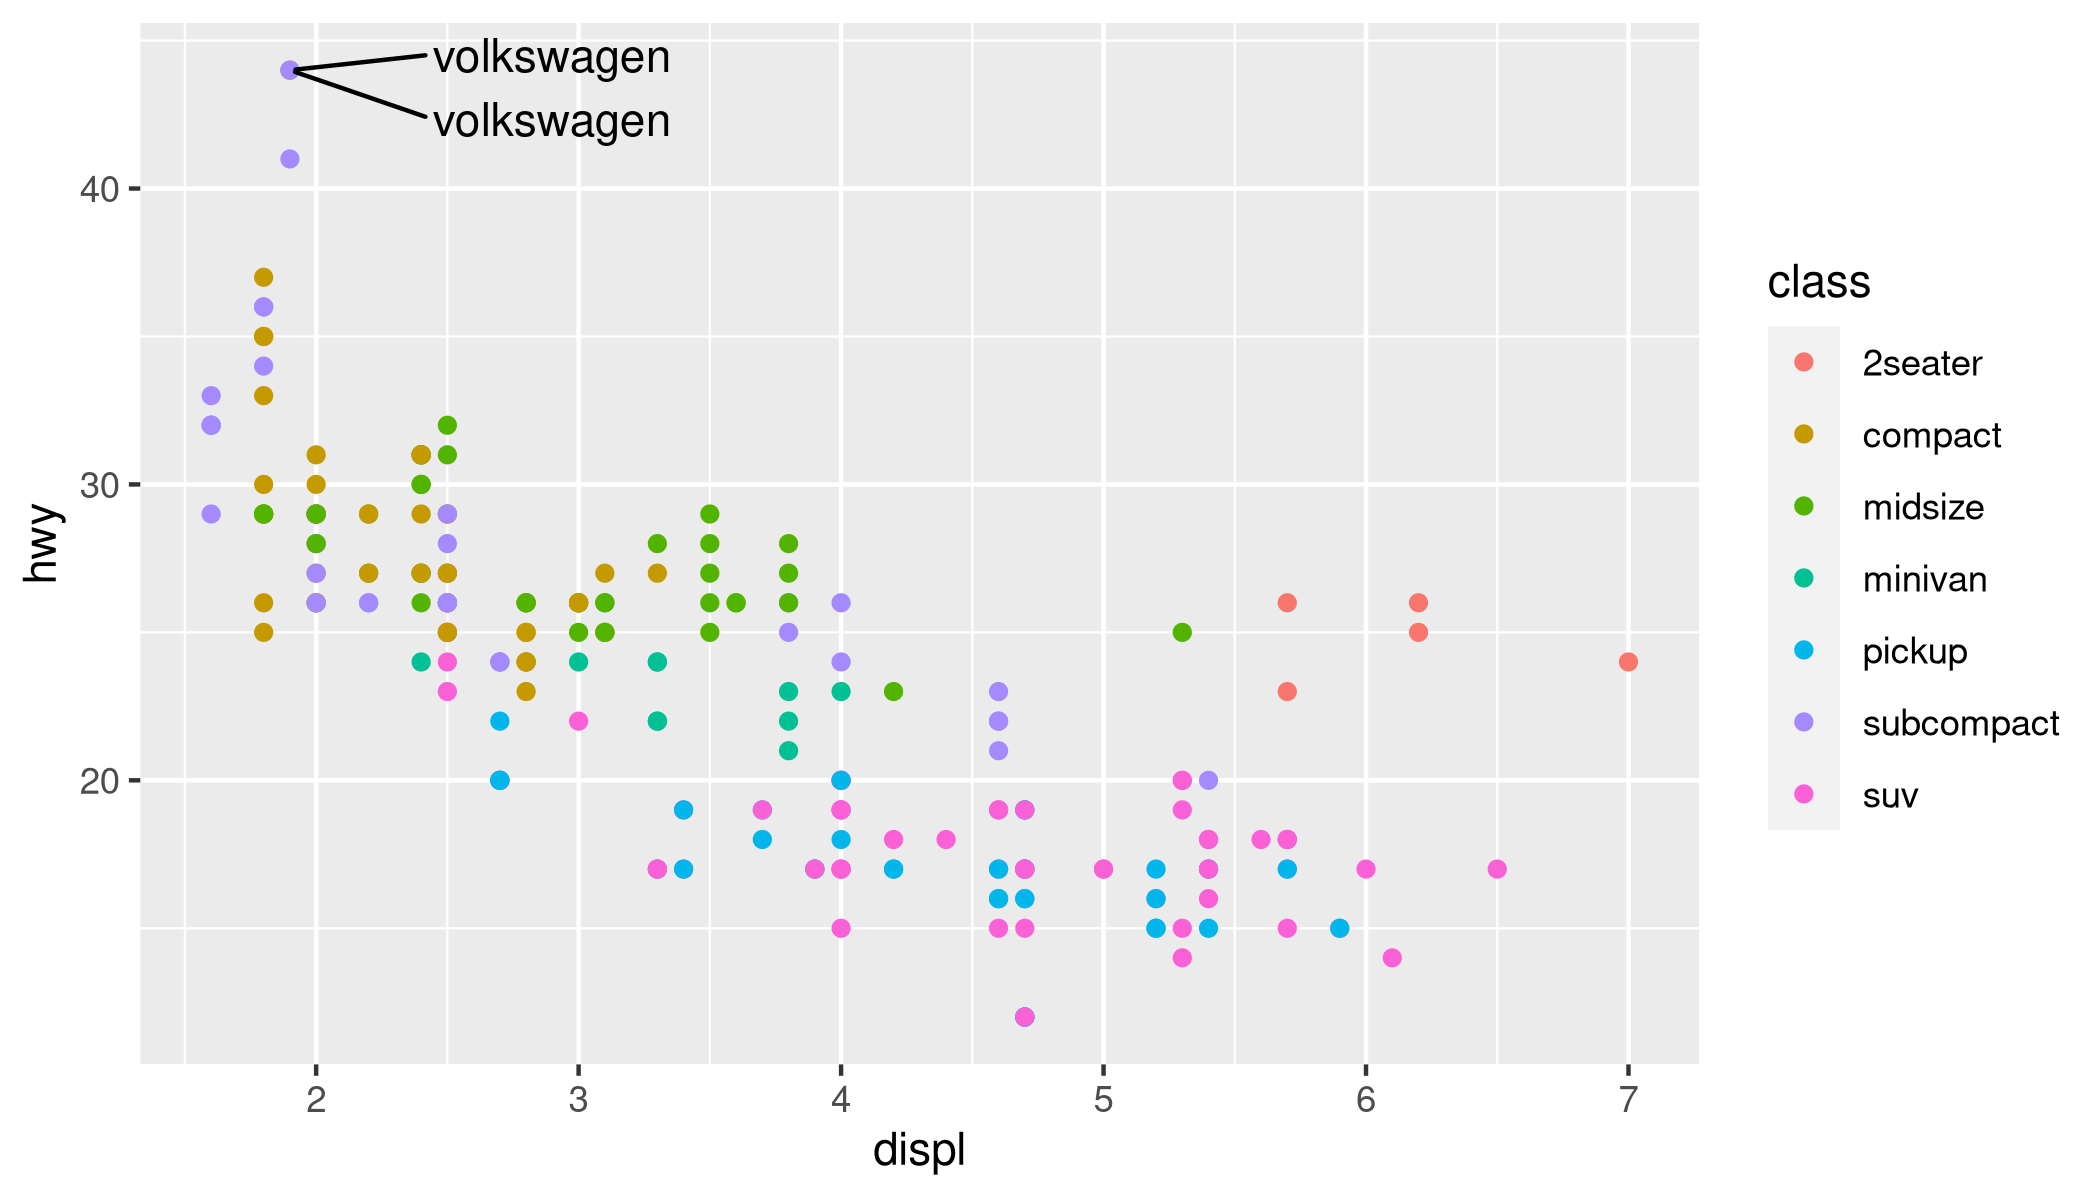

In [4]:
p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')  # this is important

p.hwy = p

p

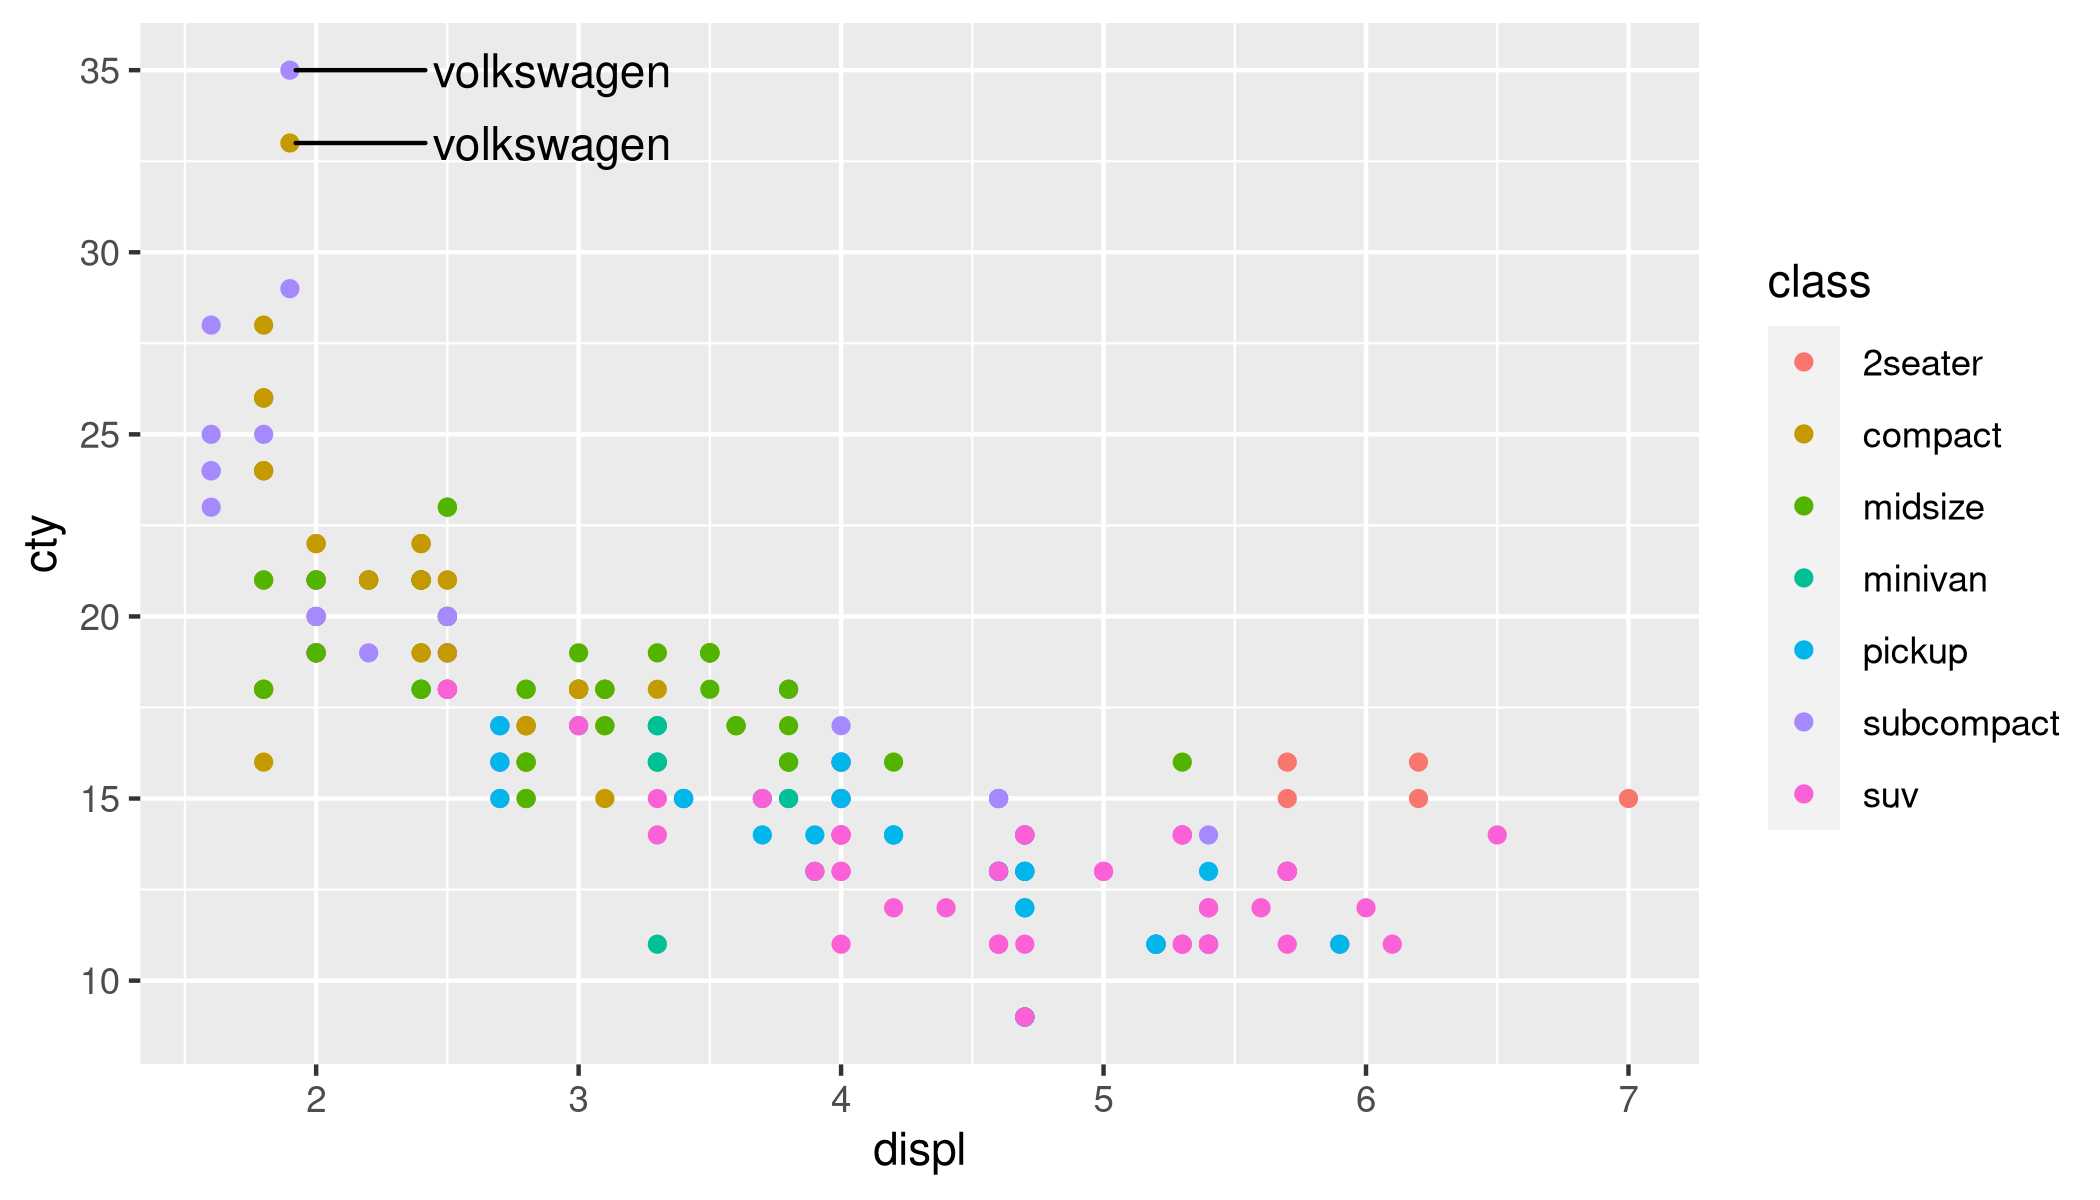

In [5]:
p = ggplot(mpg, aes(x = displ, y = cty, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')

p.cty = p

p

In [6]:
# options(repr.plot.width = 12)
# p.hwy + p.cty

In [7]:
# p.hwy = p.hwy + theme(legend.position = 'none')

# p.hwy + p.cty

In [8]:
# options(repr.plot.width = 10, repr.plot.height = 4)

# p.hwy = p.hwy + ylim(c(0, 45))

# p.cty = p.cty + ylim(c(0, 45))

# p.hwy + p.cty

# Other summary functions

In [9]:
library(nycflights13)

In [10]:
weather %>%
    group_by(month) %>%
    summarize(
        max_temp = max(temp, na.rm = TRUE),
        obs = n(),
        n_above_50 = sum(temp > 50, na.rm = TRUE),
        frac_above_50 = n_above_50/obs)

month,max_temp,obs,n_above_50,frac_above_50
<int>,<dbl>,<int>,<int>,<dbl>
1,64.40,2226,113,0.050763702
2,55.94,2010,10,0.004975124
3,60.08,2227,145,0.065110013
4,84.02,2159,1183,0.547938861
5,93.02,2232,1978,0.886200717
6,93.92,2160,2160,1.000000000
7,100.04,2228,2228,1.000000000
8,89.96,2217,2216,0.999548940
9,95.00,2159,2132,0.987494210


In [11]:
weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


Warning message:
“Removed 1 rows containing missing values (geom_point).”


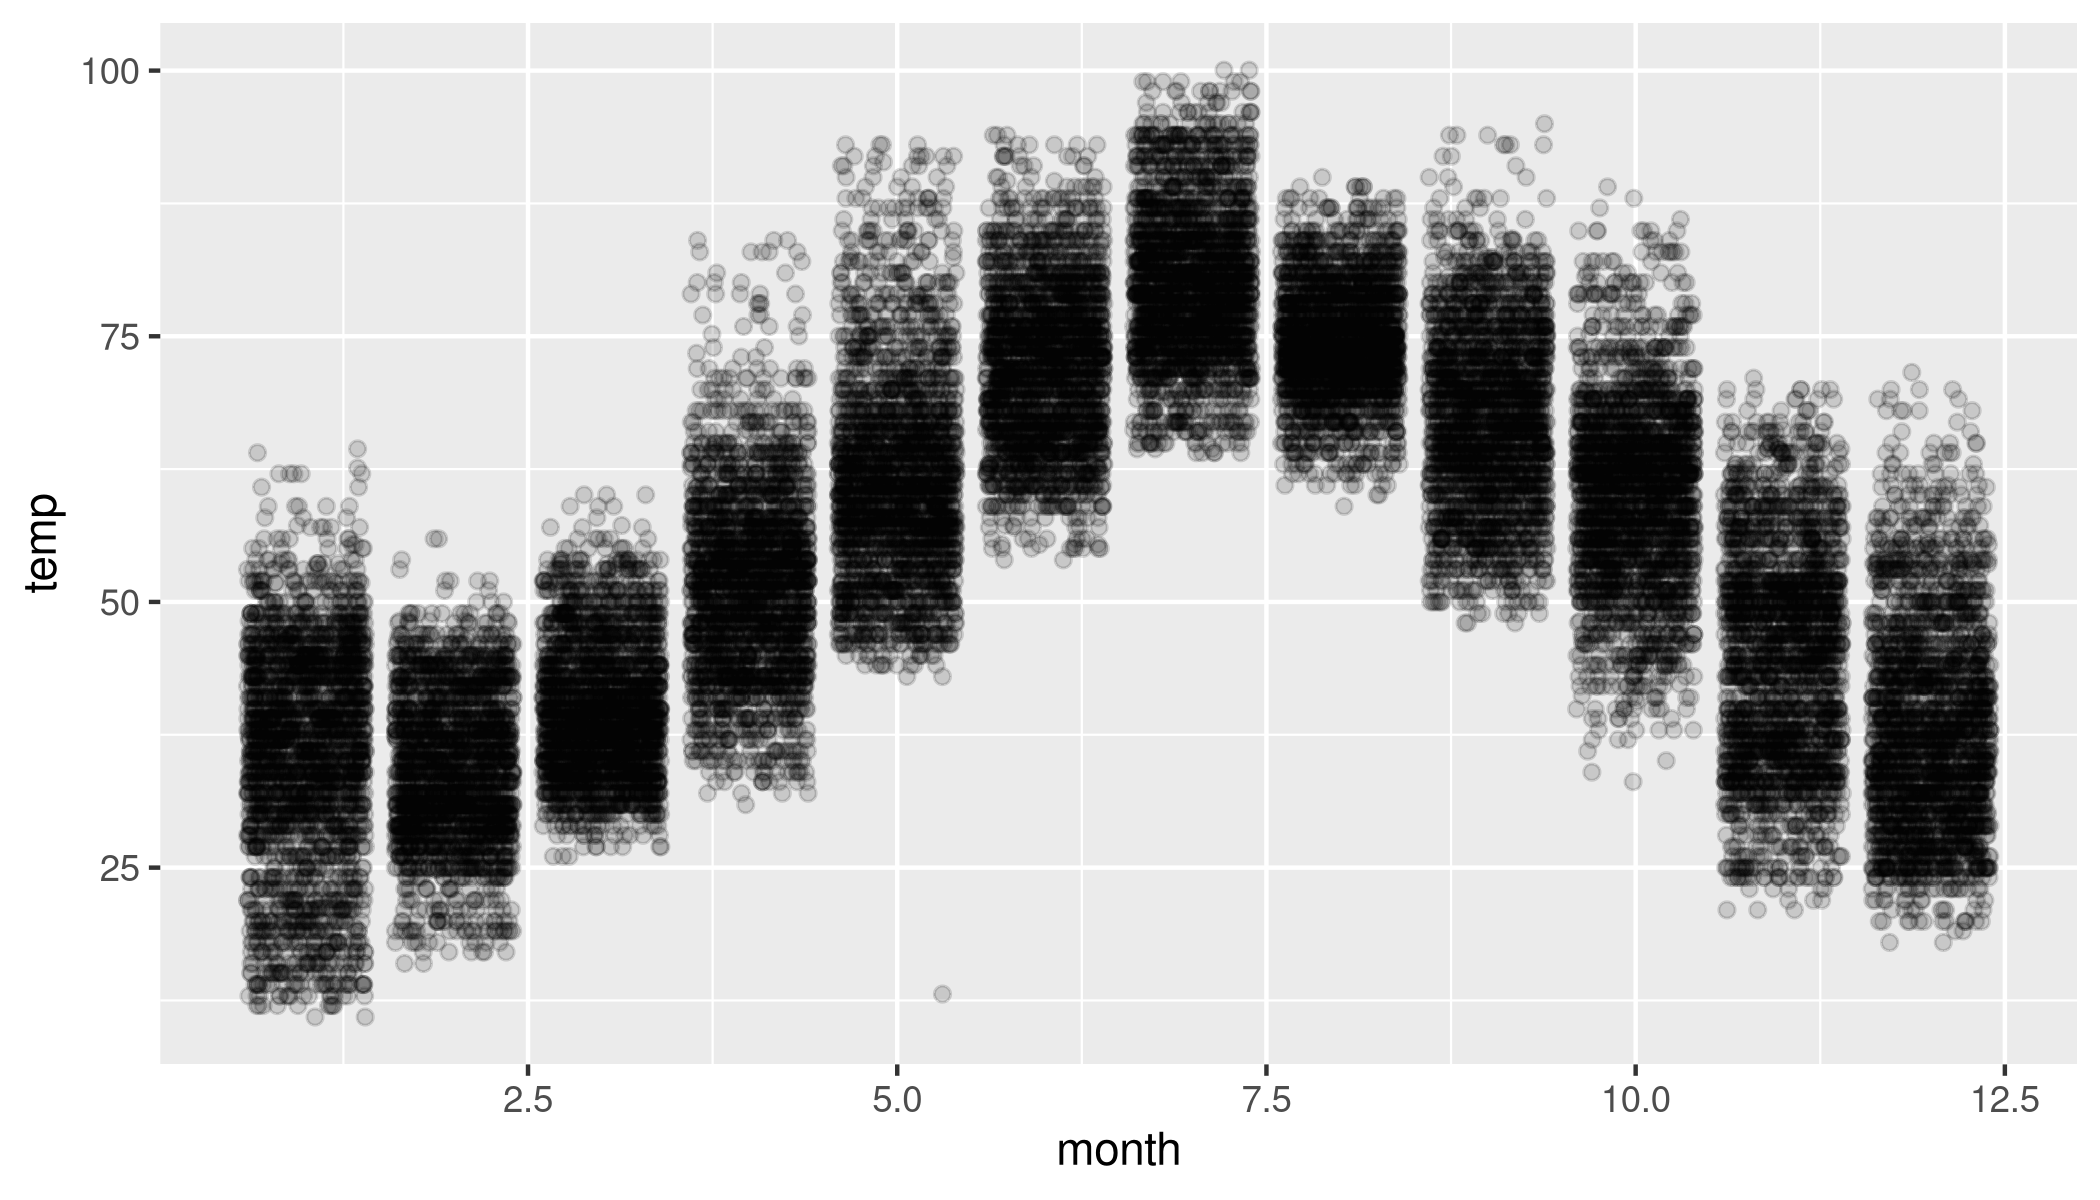

In [12]:
p = ggplot(weather, aes(x = month, y = temp))

p = p + geom_point(alpha = 0.15, 
                   position = position_jitter(h = 0, w = 0.4))


## mean, median, max, min

In [13]:
# weather %>%
#     group_by(month) %>%
#     summarize(median.temp = median(temp)) %>%
#     arrange(median.temp)

## sd, IQR

In [14]:
weather %>%
    group_by(month) %>%
    summarize(sd.temp = sd(temp)) %>%
    arrange(sd.temp)

month,sd.temp
<int>,<dbl>
3,6.249278
2,6.982378
7,7.119899
6,7.546371
9,8.465902
4,8.786168
10,8.846035
5,9.681644
12,9.982432


# Data import/export

## readr

In [15]:
?readr

readr-package {readr},R Documentation


In [16]:
?read_csv

read_delim {readr},R Documentation
file,"Either a path to a file, a connection, or literal data (either a single string or a raw vector). Files ending in .gz, .bz2, .xz, or .zip will be automatically uncompressed. Files starting with http://, https://, ftp://, or ftps:// will be automatically downloaded. Remote gz files can also be automatically downloaded and decompressed. Literal data is most useful for examples and tests. To be recognised as a path, it must be wrapped with I(), be a string containing at least one new line, or be a vector containing at least one string with a new line. Using a value of clipboard() will read from the system clipboard."
delim,Single character used to separate fields within a record.
quote,Single character used to quote strings.
escape_backslash,"Does the file use backslashes to escape special characters? This is more general than escape_double as backslashes can be used to escape the delimiter character, the quote character, or to add special characters like \\n."
escape_double,"Does the file escape quotes by doubling them? i.e. If this option is TRUE, the value """""""" represents a single quote, \""."
col_names,"Either TRUE, FALSE or a character vector of column names. If TRUE, the first row of the input will be used as the column names, and will not be included in the data frame. If FALSE, column names will be generated automatically: X1, X2, X3 etc. If col_names is a character vector, the values will be used as the names of the columns, and the first row of the input will be read into the first row of the output data frame. Missing (NA) column names will generate a warning, and be filled in with dummy names ...1, ...2 etc. Duplicate column names will generate a warning and be made unique, see name_repair to control how this is done."
col_types,"One of NULL, a cols() specification, or a string. See vignette(""readr"") for more details. If NULL, all column types will be imputed from guess_max rows on the input interspersed throughout the file. This is convenient (and fast), but not robust. If the imputation fails, you'll need to increase the guess_max or supply the correct types yourself. Column specifications created by list() or cols() must contain one column specification for each column. If you only want to read a subset of the columns, use cols_only(). Alternatively, you can use a compact string representation where each character represents one column: c = character i = integer n = number d = double l = logical f = factor D = date T = date time t = time ? = guess _ or - = skip By default, reading a file without a column specification will print a message showing what readr guessed they were. To remove this message, set show_col_types = FALSE or set 'options(readr.show_col_types = FALSE)."
col_select,"<tidy-select> Columns to include in the results, either by name or by numeric index. Use c() or list() to select with more than one expression and ?tidyselect::language for full details on the selection language."
id,"The name of a column in which to store the file path. This is useful when reading multiple input files and there is data in the file paths, such as the data collection date. If NULL (the default) no extra column is created."
locale,"The locale controls defaults that vary from place to place. The default locale is US-centric (like R), but you can use locale() to create your own locale that controls things like the default time zone, encoding, decimal mark, big mark, and day/month names."


In [17]:
?write_csv

write_delim {readr},R Documentation
x,A data frame or tibble to write to disk.
file,File or connection to write to.
delim,"Delimiter used to separate values. Defaults to "" "" for write_delim(), "","" for write_excel_csv() and "";"" for write_excel_csv2(). Must be a single character."
na,String used for missing values. Defaults to NA. Missing values will never be quoted; strings with the same value as na will always be quoted.
append,"If FALSE, will overwrite existing file. If TRUE, will append to existing file. In both cases, if the file does not exist a new file is created."
col_names,"If FALSE, column names will not be included at the top of the file. If TRUE, column names will be included. If not specified, col_names will take the opposite value given to append."
quote,How to handle fields which contain characters that need to be quoted. needed - Only quote fields which need them. all - Quote all fields. none - Never quote fields.
escape,The type of escape to use when quotes are in the data. double - quotes are escaped by doubling them. backslash - quotes are escaped by a preceding backslash. none - quotes are not escaped.
eol,"The end of line character to use. Most commonly either ""\n"" for Unix style newlines, or ""\r\n"" for Windows style newlines."
num_threads,Number of threads to use when reading and materializing vectors. If your data contains newlines within fields the parser will automatically be forced to use a single thread only.


In [18]:
library('nycflights13')

weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [19]:
weather %>% write_csv('weather.csv')

In [20]:
read_csv('weather.csv')

Rows: 26115 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): origin
dbl  (13): year, month, day, hour, temp, dewp, humid, wind_dir, wind_speed, ...
dttm  (1): time_hour


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 06:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 07:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 08:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 09:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 10:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 11:00:00
EWR,2013,1,1,7,39.02,28.04,64.43,240,14.96014,NA,0,1012.2,10,2013-01-01 12:00:00
EWR,2013,1,1,8,39.92,28.04,62.21,250,10.35702,NA,0,1012.2,10,2013-01-01 13:00:00
EWR,2013,1,1,9,39.92,28.04,62.21,260,14.96014,NA,0,1012.7,10,2013-01-01 14:00:00


In [21]:
system("head weather.csv", intern=TRUE)

[1] "origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour"
 [2] "EWR,2013,1,1,1,39.02,26.06,59.37,270,10.357019999999999,NA,0,1012,10,2013-01-01T06:00:00Z"               
 [3] "EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01T07:00:00Z"                        
 [4] "EWR,2013,1,1,3,39.02,28.04,64.43,240,11.5078,NA,0,1012.5,10,2013-01-01T08:00:00Z"                        
 [5] "EWR,2013,1,1,4,39.92,28.04,62.21,250,12.658579999999999,NA,0,1012.2,10,2013-01-01T09:00:00Z"             
 [6] "EWR,2013,1,1,5,39.02,28.04,64.43,260,12.658579999999999,NA,0,1011.9,10,2013-01-01T10:00:00Z"             
 [7] "EWR,2013,1,1,6,37.94,28.04,67.21,240,11.5078,NA,0,1012.4,10,2013-01-01T11:00:00Z"                        
 [8] "EWR,2013,1,1,7,39.02,28.04,64.43,240,14.960139999999999,NA,0,1012.2,10,2013-01-01T12:00:00Z"             
 [9] "EWR,2013,1,1,8,39.92,28.04,62.21,250,10.357019999999999,NA,0,1012.2,10,2013-01-01T13:00:00Z"             
[10] "EWR,2013,1,1,9,39.92,28.04,62.21,260,14.960139999999999,NA,0,1012.7,10,2013-01-01T14:00:00Z"

## Reading data directly from URL

In [28]:
# also works with read.csv

# marathon_df = read_csv('https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv')

marathon_df = read_csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv',
    col_types = cols()
)

spec(marathon_df)

cols(
  year = col_double(),
  name = col_character(),
  country = col_character(),
  time = col_character(),
  race.time = col_double(),
  MF = col_character(),
  country.simple = col_character()
)

In [25]:
marathon_df %>% head # try with print

year,name,country,time,race.time,MF,country.simple
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States
